# 0. 라이브러리 임포트

In [1]:
pip install mglearn

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
# 시각화 시 한글 폰트 나오도록
import matplotlib.font_manager as fm
!apt -qq -y install fonts-nanum
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
import seaborn as sns

# ML
import sklearn
import scipy as sp
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [0]:
from sklearn.metrics import f1_score

# 1. 모델 평가와 성능 향상

### 1-1. 교차 검증 

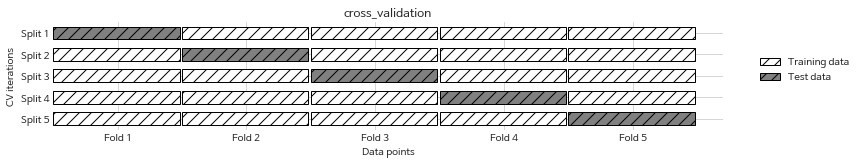

In [4]:
mglearn.plots.plot_cross_validation()

# 2. iris

In [0]:
from sklearn.datasets import load_iris

### 2-1. 교차 검증

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris['data'], iris['target'], cv=5)
print('교차 검증 점수: {}'.format(scores))

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [7]:
print('교차 검증 평균 점수: {:.3f}'.format(scores.mean()))

교차 검증 평균 점수: 0.973


* 계층별 교차 검증

In [8]:
# 레이블 별로 나뉘어있기 때문에 샘플을 3겹 교차 검증 시, 문제 발생
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

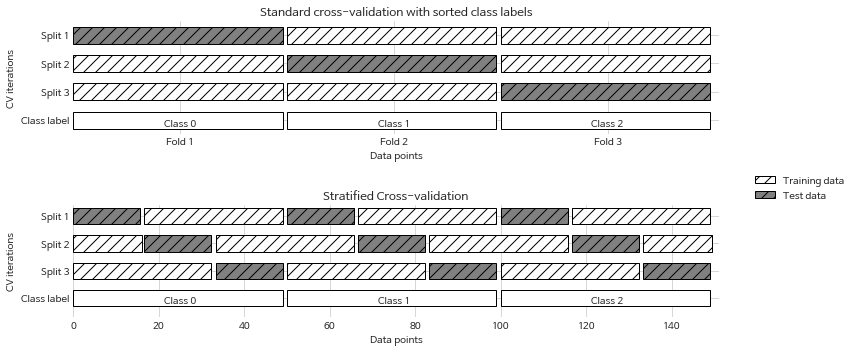

In [9]:
# scikit-learn에서는 분류에서는 계층별 k겹 교차 검증, 회귀에서는 단순 k겹 교차 검증 사용됨
mglearn.plots.plot_stratified_cross_validation()

* 교차 검증 상세 옵션

In [0]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [11]:
print('교차 검증 점수: \n{}'.format(cross_val_score(logreg, iris['data'], iris['target'], cv=kfold)))

교차 검증 점수: 
[1.         1.         0.86666667 0.93333333 0.83333333]


In [12]:
# 단순 3겹 교차검증 시 잘못된 결과
kfold = KFold(n_splits=3)
print('교차 검증 점수: \n{}'.format(cross_val_score(logreg, iris['data'], iris['target'], cv=kfold)))

교차 검증 점수: 
[0. 0. 0.]


In [13]:
# shuffle과 random_state 변수를 통해 제어
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print('교차 검증 점수: \n{}'.format(cross_val_score(logreg, iris['data'], iris['target'], cv=3)))

교차 검증 점수: 
[0.98 0.96 0.98]


* LOOCV

In [14]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print('교차 검증 분할 횟수: {}'.format(len(scores)))
print('평균 정확도: {:.3f}'.format(scores.mean()))

교차 검증 분할 횟수: 150
평균 정확도: 0.967


* 임의 분할 교차 검증

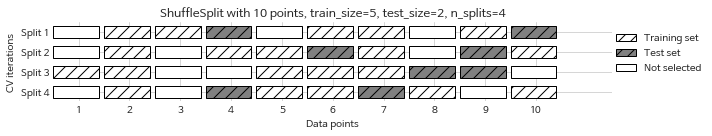

In [15]:
mglearn.plots.plot_shuffle_split()

In [16]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print('교차 검증 점수:\n{}'.format(scores))
print('교차 검증 평균 점수: {:.3f}'.format(scores.mean()))

교차 검증 점수:
[0.96       0.94666667 0.94666667 0.97333333 0.94666667 1.
 0.89333333 0.96       0.96       0.94666667]
교차 검증 평균 점수: 0.953


In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
suffle_split = StratifiedShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print('교차 검증 점수:\n{}'.format(scores))
print('교차 검증 평균 점수: {:.3f}'.format(scores.mean()))

교차 검증 점수:
[0.96       0.97333333 0.97333333 0.94666667 0.97333333 0.98666667
 0.98666667 0.94666667 0.96       0.96      ]
교차 검증 평균 점수: 0.967


### 2-2. 그리드서치

In [18]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)
print('훈련 세트의 크기: {}\t테스트 세트의 크기: {}'.format(X_train.shape, X_test.shape))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
print('최고 점수: {:.2f}'.format(best_score))
print('최적 매개변수: {}'.format(best_parameters))

훈련 세트의 크기: (112, 4)	테스트 세트의 크기: (38, 4)
최고 점수: 0.97
최적 매개변수: {'C': 100, 'gamma': 0.001}


### 2-3. 검증 세트 활용

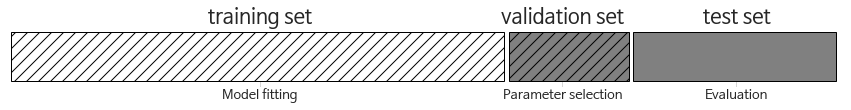

In [19]:
mglearn.plots.plot_threefold_split()

In [20]:
from sklearn.svm import SVC
# [훈련+검증], [테스트] 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
# [훈련+검증] 세트 -> [훈련], [검증] 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print('훈련 세트의 크기: {}\t검증 세트의 크기: {}\t테스트 세트의 크기: {}'.format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수 전달
        svm = SVC(gamma=gamma, C=C)
        # 모델 피팅
        svm.fit(X_train, y_train)
        # 검증 세트로 모델 평가
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma': gamma, 'C': C}
print('검증 세트에서 최고 점수: {:.3f}'.format(best_score))
print('최적 매개변수: {}'.format(best_parameters))
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
# 훈련+검증 세트 생성 후 테스트 세트를 사용하여 평가
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print('최적 매개변수에서 테스트 세트 점수: {:.3f}'.format(svm.score(X_test, y_test)))

훈련 세트의 크기: 84	검증 세트의 크기: 28	테스트 세트의 크기: 38
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
검증 세트에서 최고 점수: 0.964
최적 매개변수: {'gamma': 0.001, 'C': 10}
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
최적 매개변수에서 테스트 세트 점수: 0.921


* 교차 검증을 사용한 그리드 서치

In [21]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        # 교차 검증 적용
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # 교차 검증 정확도의 평균 계산
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
print('{:.3f}'.format(best_score))
print(best_parameters)

0.973
{'C': 10, 'gamma': 0.1}


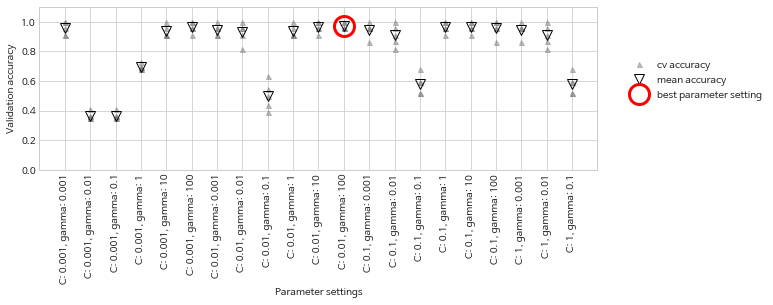

In [22]:
mglearn.plots.plot_cross_val_selection()

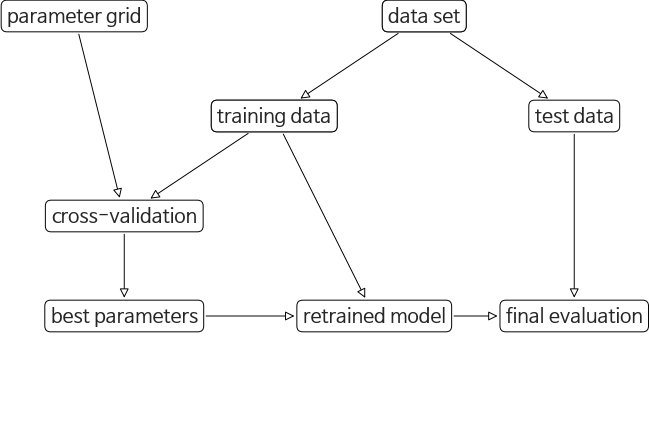

In [23]:
mglearn.plots.plot_grid_search_overview()

* GridSearchCV 실습

In [24]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                        'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print('매개변수 그리드: {}'.format(param_grid))

매개변수 그리드: {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [0]:
# 모델: SVC // 매개변수 그리드: param_grid // 교차 검증: 5-fold cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [27]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [28]:
print('테스트 세트 점수: {:.3f}'.format(grid_search.score(X_test, y_test)))
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - ')
print('최적 매개변수: {}'.format(grid_search.best_params_))
print('최상 교차 검증 점수: {:.3f}'.format(grid_search.best_score_))

테스트 세트 점수: 0.974
- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
최적 매개변수: {'C': 10, 'gamma': 0.1}
최상 교차 검증 점수: 0.973


* 교차 검증 결과 분석

In [29]:
results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001630,0.000089,0.000740,0.000084,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.001035,0.000315,0.000467,0.000189,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000787,0.000049,0.000333,0.000012,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000772,0.000030,0.000334,0.000009,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000817,0.000072,0.000343,0.000012,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


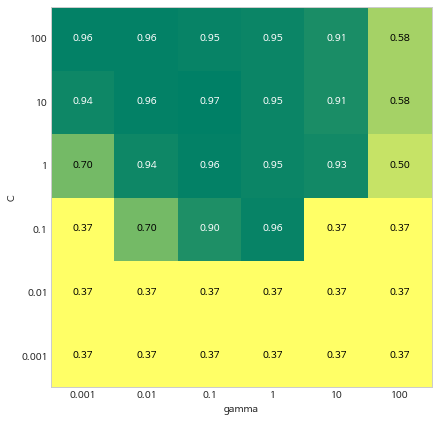

In [30]:
scores = np.array(results.mean_test_score).reshape(6, 6)
plt.figure(figsize=(7,7))
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap='summer_r')

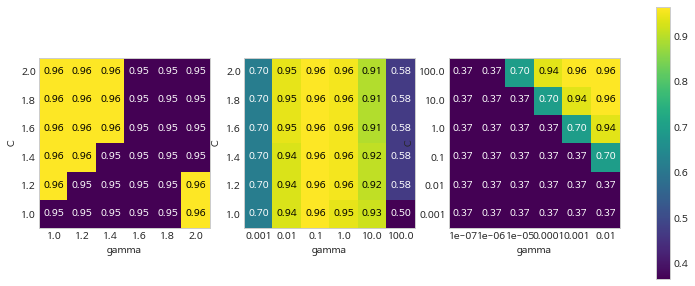

In [31]:
# 매개변수 범위 잘못 설정한 예
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                     'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # 교차 검증 평균 점수의 히트맵 그래프
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)
    
plt.colorbar(scores_image, ax=axes.tolist())

* 비대칭 매개변수 그리드 탐색

In [32]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("그리드 목록:\n", param_grid)

그리드 목록:
 [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [33]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("최적 파라미터:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적 파라미터: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.97


In [34]:
results = pd.DataFrame(grid_search.cv_results_)
results.head().T

,0,1,2,3,4
mean_fit_time,0.0014957,0.00102439,0.000787544,0.000805902,0.000749063
std_fit_time,0.00017887,0.000254875,1.15876e-05,5.71746e-05,8.2541e-06
mean_score_time,0.000662231,0.000456381,0.000349474,0.000335693,0.000338364
std_score_time,7.37659e-05,0.000114554,5.31711e-06,1.00159e-05,2.29378e-06
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
param_kernel,rbf,rbf,rbf,rbf,rbf
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826


* 중첩 교차 검증

In [35]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("교차 검증 점수: ", scores)
print("교차 검증 평균 점수: {:.3f}".format(scores.mean()))
print(param_grid)

교차 검증 점수:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
교차 검증 평균 점수: 0.980
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


# 3. Blobs

### 3-1. 그룹별 교차 검증

In [86]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import GroupKFold
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print('교차 검증 점수:\n{}'.format(scores))
print('교차 검증 평균 점수: {:.3f}'.format(scores.mean()))

교차 검증 점수:
[0.75       0.4        0.66666667]
교차 검증 평균 점수: 0.606


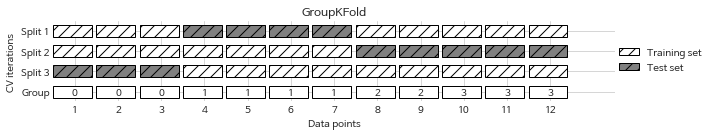

In [87]:
mglearn.plots.plot_group_kfold()

### 3-2. 불확실성

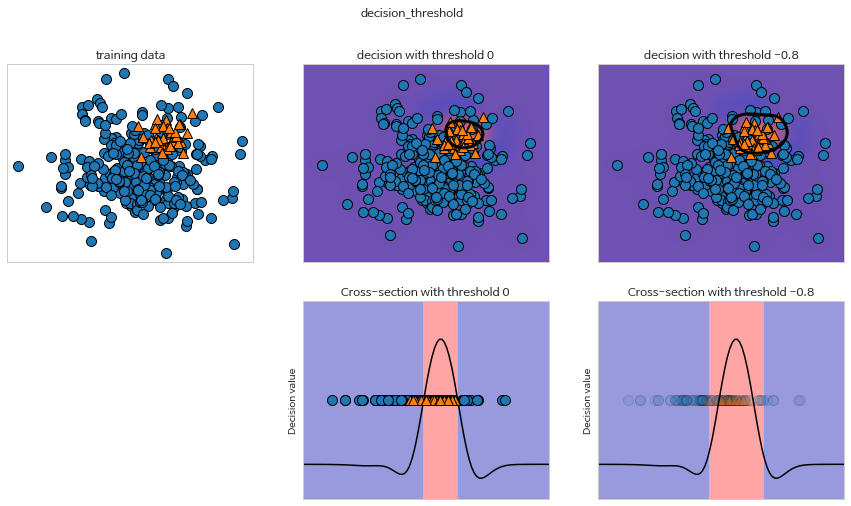

In [88]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

mglearn.plots.plot_decision_threshold()

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [0]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

* 정밀도-재현율 곡선

In [0]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

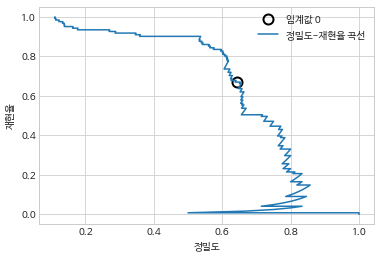

In [92]:

# 부드러운 곡선을 위해 데이터 포인트 수를 늘림
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# 0에 가까운 임계값을 찾기
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="임계값 0", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="정밀도-재현율 곡선")
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")

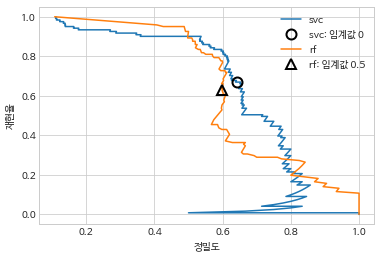

In [93]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier는 decision_function 대신 predict_proba를 제공합니다.
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="svc: 임계값 0", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="rf: 임계값 0.5", fillstyle="none", mew=2)
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")

In [94]:
print("랜덤 포레스트의 f1_score: {:.3f}".format(
    f1_score(y_test, rf.predict(X_test))))
print("svc의 f1_score: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

랜덤 포레스트의 f1_score: 0.610
svc의 f1_score: 0.656


In [95]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 평균 정밀도: {:.3f}".format(ap_rf))
print("svc의 평균 정밀도: {:.3f}".format(ap_svc))

랜덤 포레스트의 평균 정밀도: 0.660
svc의 평균 정밀도: 0.666


* ROC곡선

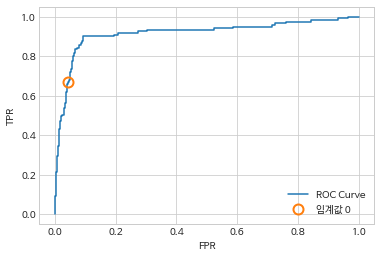

In [96]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='임계값 0', fillstyle='none', mew=2)
plt.legend(loc='best')

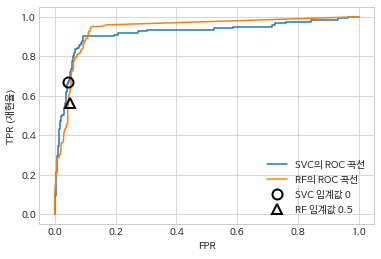

In [97]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="SVC의 ROC 곡선")
plt.plot(fpr_rf, tpr_rf, label="RF의 ROC 곡선")

plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="SVC 임계값 0", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="RF 임계값 0.5", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

In [98]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 AUC: {:.3f}".format(rf_auc))
print("SVC의 AUC: {:.3f}".format(svc_auc))

랜덤 포레스트의 AUC: 0.937
SVC의 AUC: 0.916


# 4. digits

### 4-1. 불균형 데이터셋

In [0]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [100]:
# 아무것도 학습하지 않고 False 레이블로만 예측했는데 90%의 정확도
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print('예측된 유니크 레이블: {}'.format(np.unique(pred_most_frequent)))
print('테스트 점수: {:.3f}'.format(dummy_majority.score(X_test, y_test)))

예측된 유니크 레이블: [False]
테스트 점수: 0.896


In [101]:
# 더미분류와 얼마 차이가 안남
# 모델이 잘못되었거나, 문제를 풀기에 좋은 모델이 아니거나
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print(np.unique(pred_tree))
print('테스트 점수: {:.3f}'.format(tree.score(X_test, y_test)))

[False  True]
테스트 점수: 0.918


In [102]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print('dummy 점수: {:.3f}'.format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('logreg 점수: {:.3f}'.format(logreg.score(X_test, y_test)))

dummy 점수: 0.824
logreg 점수: 0.984


* 오차 행렬(confusion matrix)

In [103]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print('오차 행렬:\n{}'.format(confusion))

오차 행렬:
[[402   1]
 [  6  41]]


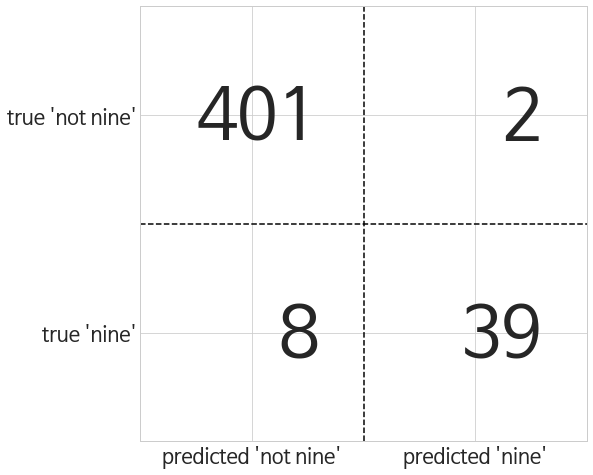

In [104]:
mglearn.plots.plot_confusion_matrix_illustration()

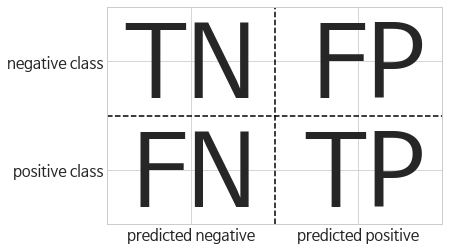

In [105]:
mglearn.plots.plot_binary_confusion_matrix()

In [106]:
# 2개의 더미, 2개의 분류 모델을 오차 행렬로 나타내기
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))
print("\n결정 트리:")
print(confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[356  47]
 [ 41   6]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀
[[402   1]
 [  6  41]]


* 정밀도와 재현율을 한 눈에! f-점수

In [107]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.12
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.92


In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



* ROC, AUC

In [0]:
y = digits.target == 9

gamma = 1.00  정확도 = 0.90  AUC = 0.50
gamma = 0.10  정확도 = 0.90  AUC = 0.96
gamma = 0.01  정확도 = 0.90  AUC = 1.00


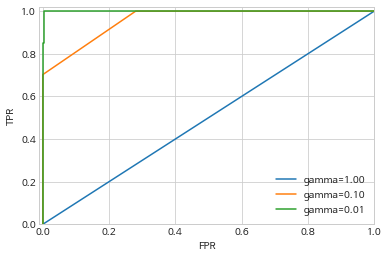

In [110]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  정확도 = {:.2f}  AUC = {:.2f}".format(
        gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.2f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

### 4-2. 다중 분류의 평가 지표

In [111]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(digits['data'], digits['target'], random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print('정확도: {:.3f}'.format(accuracy_score(y_test, pred)))
print('오차 행렬:\n{}'.format(confusion_matrix(y_test, pred)))

정확도: 0.951
오차 행렬:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


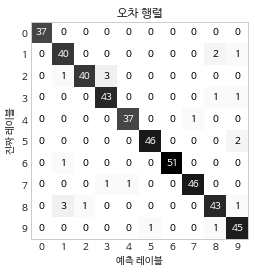

In [113]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='예측 레이블',
    ylabel='진짜 레이블', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")    
plt.title("오차 행렬")
plt.gca().invert_yaxis()

In [114]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [117]:
print('micro: {:.3f}'.format(f1_score(y_test, pred, average='micro')))
print('macro: {:.3f}'.format(f1_score(y_test, pred, average='macro')))
print('weighted: {:.3f}'.format(f1_score(y_test, pred, average='weighted')))

micro: 0.951
macro: 0.952
weighted: 0.951


### 4-3. 모델 선택에서 평가 지표 사용하기, (다른 score 방식 사용)

In [118]:
print("기본 평가 지표:", cross_val_score(SVC(), digits.data, digits.target == 9, cv=5))

explicit_accuracy =  cross_val_score(SVC(), digits.data, digits.target == 9, scoring="accuracy", cv=5)
print("정확도 지표:", explicit_accuracy)

ap =  cross_val_score(SVC(), digits.data, digits.target == 9, scoring="average_precision", cv=5)
print("평균 정밀도 지표:", ap)

기본 평가 지표: [0.975      0.99166667 1.         0.99442897 0.98050139]
정확도 지표: [0.975      0.99166667 1.         0.99442897 0.98050139]
평균 정밀도 지표: [0.97562403 0.9886322  1.         0.99853801 0.95015534]


In [119]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# 일부러 적절하지 않은 그리드를 만들기
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# 기본 정확도 측정 지표를 사요
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("정확도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수 (정확도)): {:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(
      average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(
      # grid.score 점수와 동일
      accuracy_score(y_test, grid.predict(X_test))))

정확도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.0001}
최상의 교차 검증 점수 (정확도)): 0.976
테스트 세트 평균 정밀도: 0.966
테스트 세트 정확도: 0.973


In [120]:
# 평균 정밀도 지표 사용
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="average_precision")
grid.fit(X_train, y_train)
print("평균 정밀도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수 (평균 정밀도): {:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(
      # grid.score 점수와 동일
      average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(
      accuracy_score(y_test, grid.predict(X_test))))

평균 정밀도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.01}
최상의 교차 검증 점수 (평균 정밀도): 0.988
테스트 세트 평균 정밀도: 0.996
테스트 세트 정확도: 0.896


In [121]:
from sklearn.metrics.scorer import SCORERS
print("가능한 평가 방식:\n", sorted(SCORERS.keys()))

가능한 평가 방식:
 ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']
